# Diamond Resorts Data Science Take Home Case Study

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Arvind Ramkumar 
### Email - aramkum4@asu.edu | arvindramkumar1996@gmail.com
### Contact - 4808592393

### -----------------------------------------------------------------------------------------------------------------------------------

### Import Packages 

In [654]:
import pandas as pd
import numpy as np

### Import Dataset 

In [655]:
# For easier importing of data, I have created a csv file with just the data 

df = pd.read_csv('data.csv')

### Understanding the Data  

In [656]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,1,2,Sales Executive,4,5993,8,6
1,49,No,Travel_Frequently,Research & Development,8,2,2,Research Scientist,2,5130,1,10
2,37,Yes,Travel_Rarely,Research & Development,2,4,1,Laboratory Technician,3,2090,6,0
3,33,No,Travel_Frequently,Research & Development,3,5,1,Research Scientist,3,2909,1,8
4,27,No,Travel_Rarely,Research & Development,2,7,1,Laboratory Technician,2,3468,9,2


In [657]:
print('Shape')
print(df.shape)
print('\n')
print('Info')
print(df.info())
print('\n')
print('Data Types')
print(df.dtypes)

Shape
(1470, 12)


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
Age                   1470 non-null int64
Attrition             1470 non-null object
BusinessTravel        1470 non-null object
Department            1470 non-null object
DistanceFromHome      1470 non-null int64
EmployeeNumber        1470 non-null int64
JobLevel              1470 non-null int64
JobRole               1470 non-null object
JobSatisfaction       1470 non-null int64
MonthlyIncome         1470 non-null int64
NumCompaniesWorked    1470 non-null int64
YearsAtCompany        1470 non-null int64
dtypes: int64(8), object(4)
memory usage: 137.9+ KB
None


Data Types
Age                    int64
Attrition             object
BusinessTravel        object
Department            object
DistanceFromHome       int64
EmployeeNumber         int64
JobLevel               int64
JobRole               object
JobSatisfaction        int64
MonthlyIncome          int64
N

### Influence of Each Variable on Attrition 

####  Age

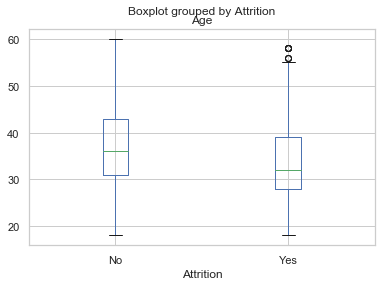

In [658]:
boxplot = df.boxplot(column='Age', by='Attrition')

The average age of people leaving the company is around 33. But, technically the average age of employee staying in the company is greater than the average age of employee leaving company. This is possible because at young age, the employee tend to jump between companies for a better position and better pay. 

#### Business Travel 

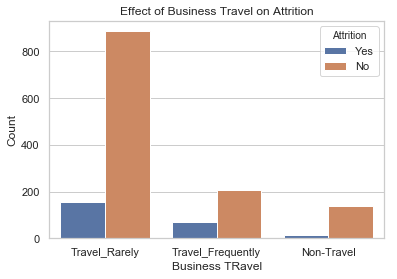

In [659]:
fig, ax= plt.subplots()
propcountfig1 = sns.countplot(x='BusinessTravel',hue='Attrition', data =df)
sns.set(style="whitegrid")
plt.xlabel("Business TRavel")
plt.ylabel("Count")
plt.title("Effect of Business Travel on Attrition")
plt.show(propcountfig1)

The necessity for business travel doesn't seem to affect the attrition. There might be a slight impact on the Class Travel_Frequently. But it's quite uncertain

#### Department  

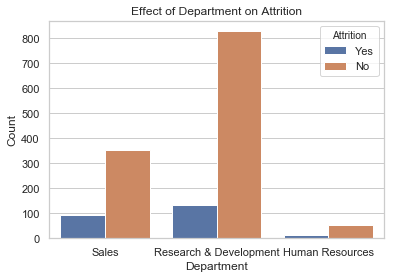

In [660]:
fig, ax= plt.subplots()
propcountfig2 = sns.countplot(x='Department',hue='Attrition', data =df)
sns.set(style="whitegrid")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Effect of Department on Attrition")
plt.show(propcountfig2)

The type of department in which the employee works doesn't seem to affect the Attrition a lot 

#### Distance From Home  

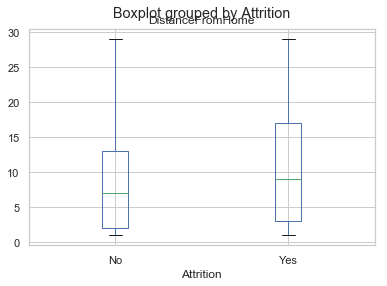

In [661]:
boxplot = df.boxplot(column='DistanceFromHome', by='Attrition')

Distance from home is one particular factor under most consideration. This is because, if their home is located at a very longer distance, they might find it hard to commute and higher possiblity for moving to another job which is closer to where they live. 

This could be seen from the above boxplot very clearly. Average distance traveled by employees who left is higher than the Average distance traveled by employees who haven't left the job

#### Job Level 

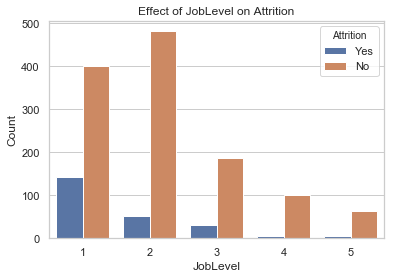

In [662]:
fig, ax= plt.subplots()
propcountfig3 = sns.countplot(x='JobLevel',hue='Attrition', data =df)
sns.set(style="whitegrid")
plt.xlabel("JobLevel")
plt.ylabel("Count")
plt.title("Effect of JobLevel on Attrition")
plt.show(propcountfig3)

With the perspective of the job level, the Job Level seem to have a higher concentration of people leaving the job. At a low job level, probably the job might be a temporary with low pay. So, probably the employee jump between companies

#### Job Role  

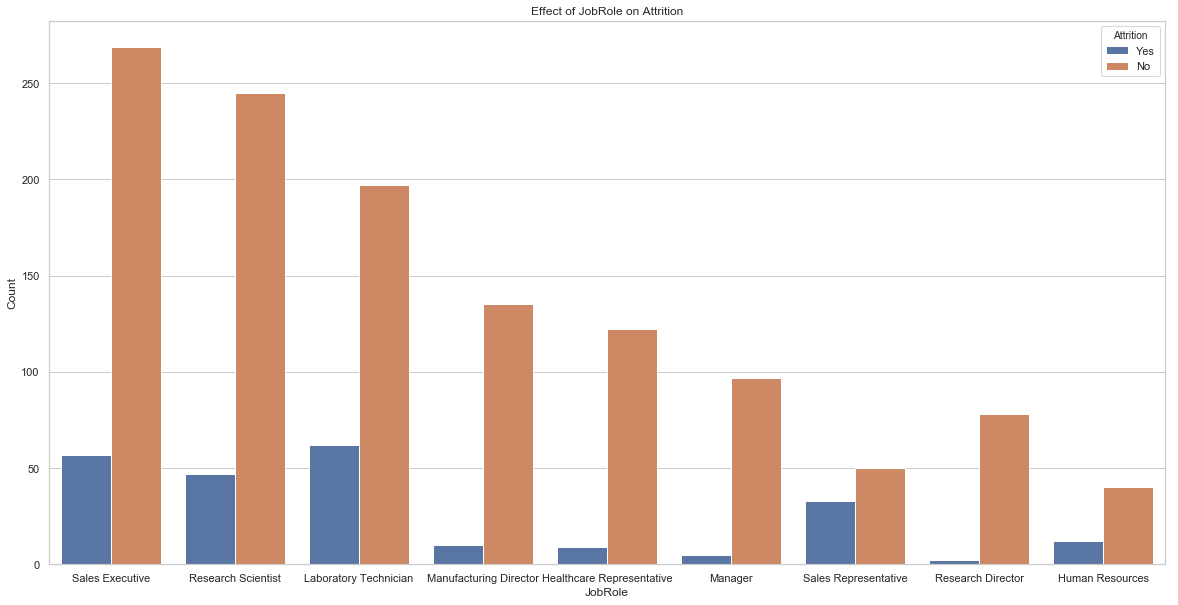

In [663]:
fig, ax= plt.subplots(figsize=(20,10))
propcountfig4 = sns.countplot(x='JobRole',hue='Attrition', data =df)
sns.set(style="whitegrid")
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.title("Effect of JobRole on Attrition")
plt.show(propcountfig4)

Since there are so many jobroles, it's not certain to visually come to conclusion at first instance. More analysis is required. But Sales executive, Research Scientist, Lab Technician contribute to the majority of the employee who leave 

#### Job Statisfaction 

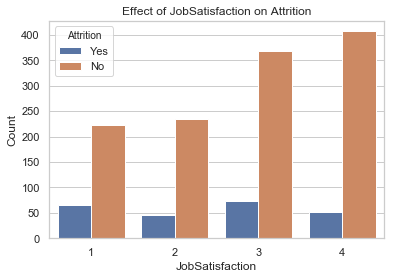

In [664]:
fig, ax= plt.subplots()
propcountfig5 = sns.countplot(x='JobSatisfaction',hue='Attrition', data =df)
sns.set(style="whitegrid")
plt.xlabel("JobSatisfaction")
plt.ylabel("Count")
plt.title("Effect of JobSatisfaction on Attrition")
plt.show(propcountfig5)

It is quite obvious that the employee with higher job statisfaction tend to stay in the job longer. It is also obvious from the graph

#### Monthly Income  

##### Box Plot 

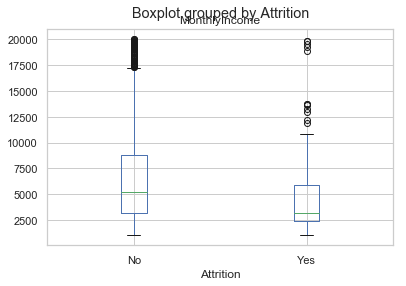

In [665]:
boxplot = df.boxplot(column='MonthlyIncome', by='Attrition')

Supposedly, Monthly Income is a most important factor. Average salary of Employee who leave is much lesser than Average Salary of Employee who do not leave. But another thing to note is the presence of so many outliers. So these outliers might affect our result. So further analysis is suggested for this factor. 

###### Distribution 

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


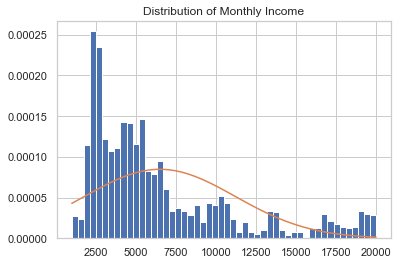

In [666]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(df.MonthlyIncome, 50, normed=1)
mu = np.mean(df.MonthlyIncome)
sigma = np.std(df.MonthlyIncome)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.title('Distribution of Monthly Income')
plt.show()

The distribution will help us understand that there is a skewness, indicating that there are only less number of employees who receive higher salaries

#### Number of Companies Worked 

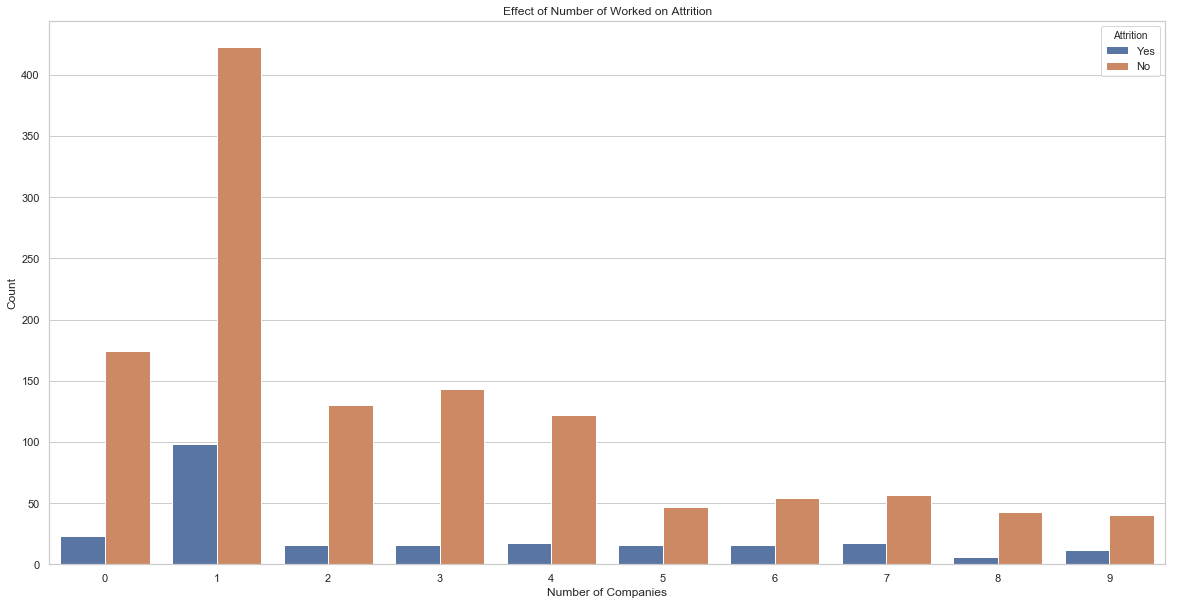

In [667]:
fig, ax= plt.subplots(figsize=(20,10))
propcountfig6 = sns.countplot(x='NumCompaniesWorked',hue='Attrition', data =df)
sns.set(style="whitegrid")
plt.xlabel("Number of Companies")
plt.ylabel("Count")
plt.title("Effect of Number of Worked on Attrition")
plt.show(propcountfig6)

The ratio of number of employee leave the company to the number of employee stay is almost pretty much constant. 

#### Years at Company  

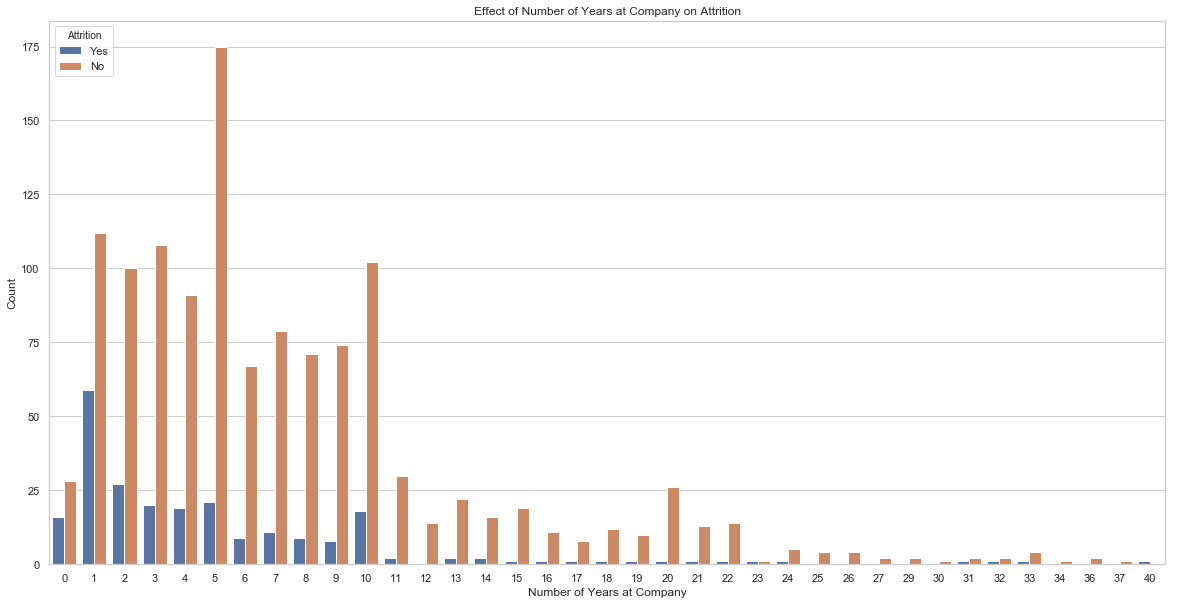

In [668]:
fig, ax= plt.subplots(figsize=(20,10))
propcountfig6 = sns.countplot(x='YearsAtCompany',hue='Attrition', data =df)
sns.set(style="whitegrid")
plt.xlabel("Number of Years at Company")
plt.ylabel("Count")
plt.title("Effect of Number of Years at Company on Attrition")
plt.show(propcountfig6)

Because of so many categories, we need to do further analysis to reach any conclusion

### Correlation between variables 

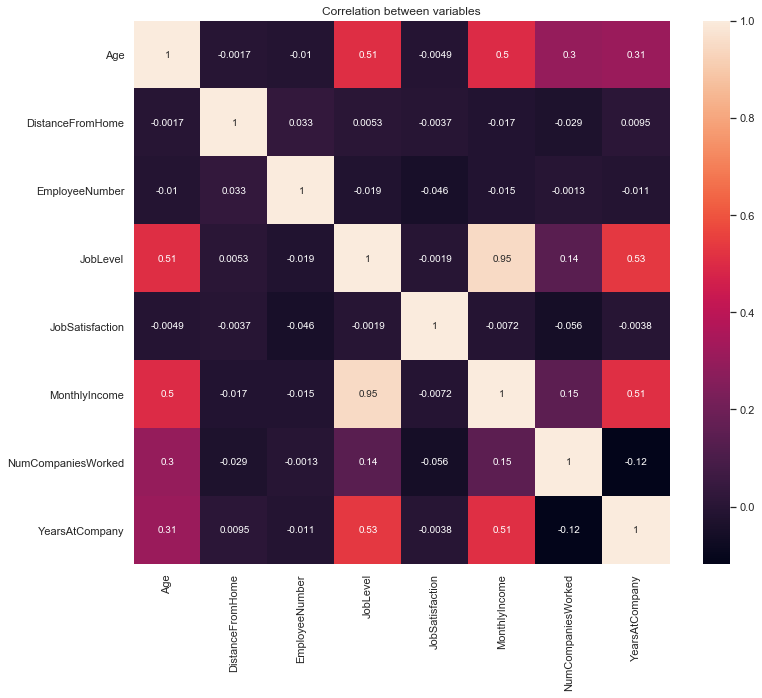

In [669]:
# Correlation between the variables 

corr = df.corr()
%matplotlib inline
import seaborn as sns

fig, ax= plt.subplots(figsize=(12,10))
corre = sns.heatmap(corr, annot = True)
sns.set(style="whitegrid")
plt.title("Correlation between variables")
plt.show(corre)

From correlation plot, one thing that's so much clear is that the monlthy income has high correlation with the Job level and that seems pretty straight forward. 

### Data Preprocessing  

#### Coding the Categorical Variables into Numericals  

In [670]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['JobRole'] = le.fit_transform(df['JobRole'])

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,41,1,2,2,1,1,2,7,4,5993,8,6
1,49,0,1,1,8,2,2,6,2,5130,1,10
2,37,1,2,1,2,4,1,2,3,2090,6,0
3,33,0,1,1,3,5,1,6,3,2909,1,8
4,27,0,2,1,2,7,1,2,2,3468,9,2


### Output Class Distribution  

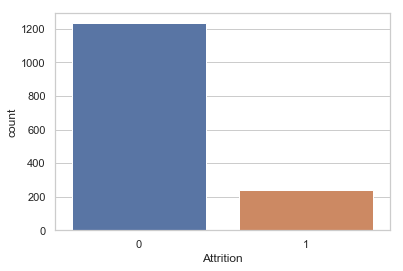

In [671]:
# Now lets check the class distributions

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

sns.countplot("Attrition",data=df)

### Approach for Analysis

We need to decide the parameters that affects Attrition. We develop a Predictive Model and based on the P value of the variables, we will know the contribution of that parameter to the model. After deciding that, we can look on how that individual parameters affect the Attrition. 

We develop a Logistics Regression Prediction Model, because for a binary class output, Logistic Regression model performs better than any other model. So, we split the data into test and train. Develop an optimal Logistics Regression model with parameter fine tuning and then, we incorporate it for the full model. 

As there is a class imbalance, we use SMOTE Algorithm for the resampling. 

### Split Train and Test 

In [672]:
# Splitting the Train and Test Data 

from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df, test_size = 0.2, random_state = 123)

In [673]:
# Train Data 

Xtrain = data_train.iloc[:, data_train.columns != 'Attrition']
ytrain = data_train.iloc[:, data_train.columns == 'Attrition']

# Test Data 

Xtest = data_test.iloc[:, data_test.columns != 'Attrition']
ytest = data_test.iloc[:, data_test.columns == 'Attrition']

#### Defining Function for Confusion Matrix 

In [674]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Resampling using SMOTE Algorithm 

In [675]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(Xtrain, ytrain)

print(len(y_train_res[y_train_res==0]))
print(len(y_train_res[y_train_res==1]))

977
977


/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Base Linear Regression Model 

In [676]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=123)
model_fit=model.fit(x_train_res, y_train_res)
y_pred=model.predict(Xtest)

accuracy 0.673469387755102

 classification report
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       256
           1       0.22      0.61      0.32        38

   micro avg       0.67      0.67      0.67       294
   macro avg       0.57      0.64      0.55       294
weighted avg       0.83      0.67      0.73       294


 confusion matrix
[[175  81]
 [ 15  23]]


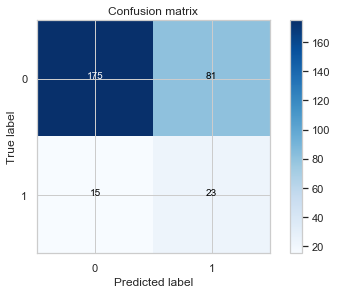


 Recall Metric in the testing dataset
0.6052631578947368

 score_auc
0.6444284539473684


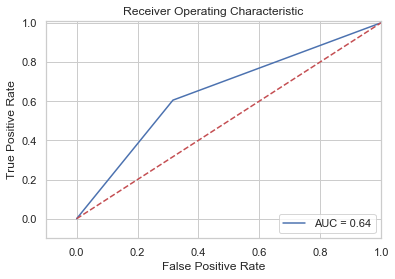

In [677]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

print('accuracy',accuracy_score(ytest,y_pred))
print('\n classification report')
print(classification_report(ytest,y_pred))
print('\n confusion matrix')
print(confusion_matrix(ytest,y_pred))

cnf_matrix = confusion_matrix(ytest,y_pred)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

print('\n Recall Metric in the testing dataset')
print(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

fpr,tpr,thresholds=roc_curve(ytest,y_pred)
score_auc=roc_auc_score(ytest,y_pred)
print('\n score_auc')
print(score_auc)

# Plot ROC

roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Grid Search to hypertune the Parameter - C 

In [678]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

clf.fit(X=Xtrain, y=ytrain.values.ravel())
print('Best Parameters:{}'.format(clf.best_params_))
print(clf.best_params_)

Best Parameters:{'C': 0.001}
{'C': 0.001}


### Logistic Model with Optimal C 

In [679]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=123, C = 0.001)
model_fit=model.fit(x_train_res, y_train_res)
y_pred=model.predict(Xtest)

accuracy 0.6292517006802721

 classification report
              precision    recall  f1-score   support

           0       0.92      0.62      0.75       256
           1       0.21      0.66      0.31        38

   micro avg       0.63      0.63      0.63       294
   macro avg       0.57      0.64      0.53       294
weighted avg       0.83      0.63      0.69       294


 confusion matrix
[[160  96]
 [ 13  25]]


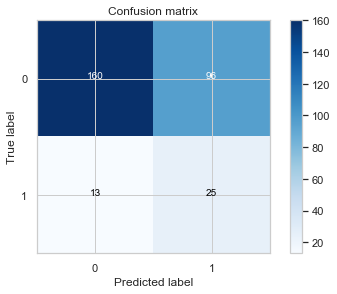


 Recall Metric in the testing dataset
0.6578947368421053

 score_auc
0.6414473684210527


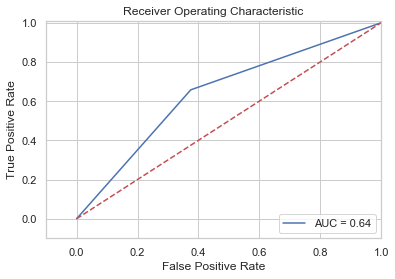

In [680]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

print('accuracy',accuracy_score(ytest,y_pred))
print('\n classification report')
print(classification_report(ytest,y_pred))
print('\n confusion matrix')
print(confusion_matrix(ytest,y_pred))

cnf_matrix = confusion_matrix(ytest,y_pred)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

print('\n Recall Metric in the testing dataset')
print(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

fpr,tpr,thresholds=roc_curve(ytest,y_pred)
score_auc=roc_auc_score(ytest,y_pred)
print('\n score_auc')
print(score_auc)

# Plot ROC

roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comparing two Models 


| Model               | Recall | AUC |Test Accuracy |
| --------------------|--------|-----|--------------|
| Logistic Regression |	0.60   | 0.64|	0.67        |
| GridSearch + LR	  | 0.65   | 0.64|	0.63        |

### Building the Model for the Whole Dataset 

In [681]:
X = df.iloc[:, df.columns != 'Attrition']
y = df.iloc[:, df.columns == 'Attrition']

#### Resampling the entire set  

In [682]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X, y)

print(len(y_res[y_res==0]))
print(len(y_res[y_res==1]))

X = x_res
y = y_res

1233
1233


/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Logistic Regression for Entire Model 

In [683]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=123, C = 0.001)
model_fit=model.fit(X, y)
y_pred=model.predict(X)

accuracy 0.6711273317112734

 classification report
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1233
           1       0.67      0.69      0.68      1233

   micro avg       0.67      0.67      0.67      2466
   macro avg       0.67      0.67      0.67      2466
weighted avg       0.67      0.67      0.67      2466


 confusion matrix
[[809 424]
 [387 846]]


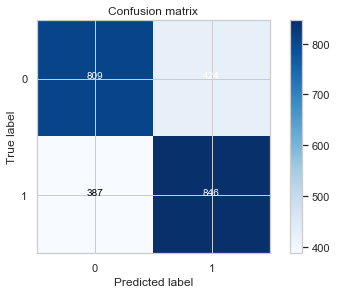


 Recall Metric in the testing dataset
0.6861313868613139

 score_auc
0.6711273317112734


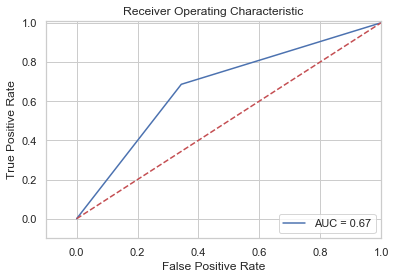

In [684]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

print('accuracy',accuracy_score(y,y_pred))
print('\n classification report')
print(classification_report(y,y_pred))
print('\n confusion matrix')
print(confusion_matrix(y,y_pred))

cnf_matrix = confusion_matrix(y,y_pred)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

print('\n Recall Metric in the testing dataset')
print(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

fpr,tpr,thresholds=roc_curve(y,y_pred)
score_auc=roc_auc_score(y,y_pred)
print('\n score_auc')
print(score_auc)

# Plot ROC

roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Contribution of Factors to the Attrition

In [685]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# test p-values
x = X
y = y
model = LogisticRegression(C = 0.001).fit(x, y)
print(logit_pvalue(model, x))

# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y, sm.add_constant(x)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

[9.01025581e-01 9.41255353e-01 6.37385764e-01 8.71289128e-01
 3.63387098e-11 1.14136108e-02 7.97186513e-01 3.71683185e-03
 1.02468050e-04 1.63031149e-02 4.76086221e-02 1.98923518e-02]
[3.59687841e-36 2.06467083e-06 1.34200195e-09 1.04839085e-03
 1.87505515e-07 4.10616763e-01 5.29520108e-09 1.49542912e-04
 4.23314699e-35 9.01470570e-04 2.90710817e-03 4.76629247e-01]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2466
Model:                          Logit   Df Residuals:                     2454
Method:                           MLE   Df Model:                           11
Date:                Sat, 31 Aug 2019   Pseudo R-squ.:                  0.1467
Time:                        16:11:52   Log-Likelihood:                -1458.5
converged:                       True   LL-Null:                       -1709.3
                                        LLR p-value:                1.520e-100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5793      0.285     12.558      0.000       3.021       4.138
x1            -0.0300      0.006     -4.747      0.000      -0.042      -0.018
x2            -0.4261      0.070     -6.062      0.000      -0.564      -0.288
x3            -0.3906      0.119     -3.277      0.001      -0.624      -0.157
x4             0.0309      0.006      5.211      0.000       0.019       0.042
x5         -6.256e-05    7.6e-05     -0.823      0.411      -0.000    8.65e-05
x6            -0.8275      0.142     -5.838      0.000      -1.105      -0.550
x7             0.0995      0.026      3.792      0.000       0.048       0.151
x8            -0.5353      0.043    -12.361      0.000      -0.620      -0.450
x9             0.0001   3.33e-05      3.320      0.001    4.52e-05       0.000
x10            0.0620      0.021      2.977      0.003       0.021       0.103
x11           -0.0076      0.011     -0.712      0.477      -0.028       0.013
==============================================================================
"""

|     | Name of the Variable | 
| ----|----------------------|
| x1  |	 Age                 |
| x2  |  BusinessTravel      |
| x3  |  Department      |
| x4  |  DistanceFromHome      |
| x5  |  EmployeeNumber      |
| x6  |  JobLevel      |
| x7  |  JobRole      |
| x8  |  JobSatisfaction      |
| x9  |  MonthlyIncome      |
| x10 |  NumCompaniesWorked      |
| x11 |  YearsAtCompany      |

Now, we can see that, based on the p-value (p-value > Alpha (0.05)) will indicate that the parameter is not significant). 

Accordingly, YearsAtCompany and Employee Number has the least contribution (Insignificant) to the Attrition

### Next Process 

Now, we need to analyze how does these factors affect the Attrition. For that, we convert all the continuous variables into categorical, and we study, how these categories affect the attrition. 

Based on that we might be able to understand how each factor and their range will affect the model

#### Other Notable Findings  

The impact of the monthly income seems to be  slightly insignificant. This is because of the very low coeffecient. So, we perform a t-test to determine whether there is a significant difference between Average Monthly salary for employees who leave and who do not 

### T- test to determine whether the monthly salary affects the person leaving or not 

In [686]:
df1 = df.copy()

The very basic assumption for a t-test is Normality. So, we check for the distibution. If it is not normally distributed, we use the Log transformation

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


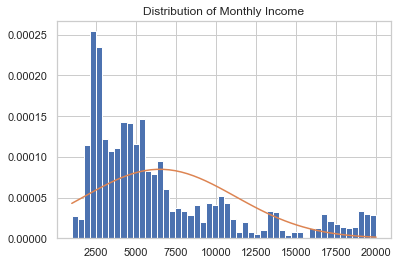

In [687]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(df1.MonthlyIncome, 50, normed=1)
mu = np.mean(df1.MonthlyIncome)
sigma = np.std(df1.MonthlyIncome)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.title('Distribution of Monthly Income')
plt.show()

Since the distribution is skewed, we use log transformation. 

In [688]:
from scipy.stats import boxcox

# Transformation 
df1['MonthlyIncome'] = boxcox(df1['MonthlyIncome'], 0)

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


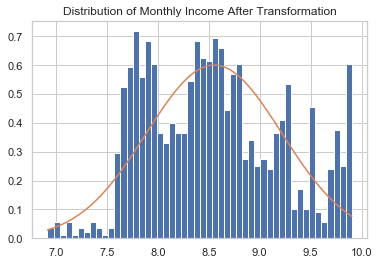

In [689]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(df1.MonthlyIncome, 50, normed=1)
mu = np.mean(df1.MonthlyIncome)
sigma = np.std(df1.MonthlyIncome)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.title('Distribution of Monthly Income After Transformation')
plt.show()

1. This is close we could get to the normality. The distirbution is so skewed that, a perfect normal distribution isn't possible. So, we continue with our T-test using this transformed values

2. We achieve near normality and proceed with this

#### T - test 

1. Since, the data is normally distributed (After the transformation) and Independent, we can perform t- test to compare the means of these two.

2. Average Monthly Income of Employees who do not leave – µ_1 | Average Monthly Income of Employees who leave – µ_2

    1. Null Hypothesis – H0 : µ_1= µ_2
    2. Alternate Hypothesis – H1 : µ_1 > µ_2

3. Here, as far as this problem is concerned, it is preferable to do Welch’s T test, because there is high possibility that the Variance of these samples might not be equal.

4. So, for the Rejection Criteria for the Null Hypothesis, the test statistic < -t (α,V). Since the Degree of Freedom is Really high, we choose the comparing statistic to be 1.96 (From t table).

5. Also, If p-value is less than 0.5, it also rejects the null hypothesis.

In [690]:
from scipy.stats import ttest_ind

yes = df1[(df1['Attrition'] == 1)]
no = df1[(df1['Attrition'] == 0)]

# t test

results = ttest_ind(yes.MonthlyIncome, no.MonthlyIncome, equal_var=False)

alpha = 0.05
if ((results[0] < 0) & (results[1]/2 < alpha)):
    print ("Reject Null Hypothesis, Average Monthly Income of Employee who {} is greater Average Monthly Income of Employee who {}".format('do not leave','will leave'))
else:
    print ("Accept Null Hypothesis")

Reject Null Hypothesis, Average Monthly Income of Employee who do not leave is greater Average Monthly Income of Employee who will leave


#### Visualize the average Monthly Income of people who leave and who do not 

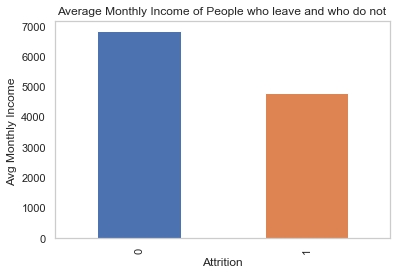

In [691]:
AVG4 = df.groupby('Attrition')['MonthlyIncome'].mean()

fig, ax = plt.subplots()
AVG4.plot.bar(ax = ax)
plt.title('Average Monthly Income of People who leave and who do not ')
plt.xlabel('Attrition')
plt.ylabel('Avg Monthly Income ')
ax.grid()
plt.show()

### Converting Continuous into Categorical 

In [692]:
df2 = pd.read_csv('data.csv')

In [693]:
df2.describe()

,Age,DistanceFromHome,EmployeeNumber,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1024.865306,2.063946,2.728571,6502.931293,2.693197,7.008163
std,9.135373,8.106864,602.024335,1.106940,1.102846,4707.956783,2.498009,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,1.000000,2.000000,2911.000000,1.000000,3.000000
50%,36.000000,7.000000,1020.500000,2.000000,3.000000,4919.000000,2.000000,5.000000
75%,43.000000,14.000000,1555.750000,3.000000,4.000000,8379.000000,4.000000,9.000000
max,60.000000,29.000000,2068.000000,5.000000,4.000000,19999.000000,9.000000,40.000000


The Employee Number is not required for analysis part. The Job Level, Job Satisfaction and Number of Companies worked are at given quantity, So, its not necessary for us to convert them. 

We Convert Age, Distance from home, Monthly Income and Years at Company to categorical. 

In [694]:
df2['Age'] = pd.cut(df2.Age,
                     bins=[17,20,25,30,35,40,45,50,55,60], 
                     labels=["15 - 20", "21 - 25", "26 - 30", "31 - 35", "36 - 40", "41 - 45", "46 - 50", "51 - 55", "Greater than 55"])

df2['DistanceFromHome'] = pd.cut(df2.DistanceFromHome,
                     bins=[0,5,10,15,20,25,30], 
                     labels=["0 - 5", "6 - 10", "11 - 15", "16 - 20", "21 - 25", "Greater than 25"])

df2['MonthlyIncome'] = pd.cut(df2.MonthlyIncome,
                     bins=[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000], 
                     labels=["1 - 2500", "2501 - 5000", "5001 - 7500", "7501 - 10000", "10001 - 12500", "12501 - 15000", "15001 - 17500", "Greather than 17501"])

df2['YearsAtCompany'] = pd.cut(df2.YearsAtCompany,
                    bins=[-1,5,10,15,20,25,30, 35, 40], 
                     labels=["0 - 5", "6 - 10", "11 - 15", "16 - 20", "21 - 25", "26 - 30", "31 - 35", "Greater than 36"])


In [695]:
df2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,41 - 45,Yes,Travel_Rarely,Sales,0 - 5,1,2,Sales Executive,4,5001 - 7500,8,6 - 10
1,46 - 50,No,Travel_Frequently,Research & Development,6 - 10,2,2,Research Scientist,2,5001 - 7500,1,6 - 10
2,36 - 40,Yes,Travel_Rarely,Research & Development,0 - 5,4,1,Laboratory Technician,3,1 - 2500,6,0 - 5
3,31 - 35,No,Travel_Frequently,Research & Development,0 - 5,5,1,Research Scientist,3,2501 - 5000,1,6 - 10
4,26 - 30,No,Travel_Rarely,Research & Development,0 - 5,7,1,Laboratory Technician,2,2501 - 5000,9,0 - 5
5,31 - 35,No,Travel_Frequently,Research & Development,0 - 5,8,1,Laboratory Technician,4,2501 - 5000,0,6 - 10
6,Greater than 55,No,Travel_Rarely,Research & Development,0 - 5,10,1,Laboratory Technician,1,2501 - 5000,4,0 - 5
7,26 - 30,No,Travel_Rarely,Research & Development,21 - 25,11,1,Laboratory Technician,3,2501 - 5000,1,0 - 5
8,36 - 40,No,Travel_Frequently,Research & Development,21 - 25,12,3,Manufacturing Director,3,7501 - 10000,0,6 - 10
9,36 - 40,No,Travel_Rarely,Research & Development,Greater than 25,13,2,Healthcare Representative,3,5001 - 7500,6,6 - 10


Now, we export the dataset to CSV and use pivot table to analyze 

In [696]:
df2.to_csv('analyze.csv')

Further Analysis is done in Excel, and the findings and recommendations are summarized in a word document